In [8]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200207a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200207a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200207a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 41422  204.527908  0.672753
 41542  212.615952  0.679619
 41662  220.672379  0.685977
 41782  228.836365  0.692358
 41902  236.801971  0.697746
 ...           ...       ...
 75767  191.538361  0.733224
 75887  173.169327  0.672173
 76007  164.107941  0.663396
 76127  154.518753  0.651876
 76247  141.006546  0.615710
 
 [291 rows x 2 columns],            time
 0       43344.0
 1       43344.1
 2       43344.2
 3       43344.3
 4       43344.4
 ...         ...
 329565  76300.5
 329566  76300.6
 329567  76300.7
 329568  76300.8
 329569  76300.9
 
 [329570 rows x 1 columns])

In [19]:
array = np.arange(41422,76301, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)

data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:19220],inplace=True)
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['index']==43344]
#df_r = data_int.iloc[0:274510,:]
#df_r

,time,F_dw,f_dir
0,43344,334.775915,0.753018
1,43344,334.824408,0.753107
2,43344,334.872901,0.753195
3,43344,334.921394,0.753284
4,43344,334.969886,0.753373
...,...,...,...
329565,76300,141.006546,0.615710
329566,76300,141.006546,0.615710
329567,76300,141.006546,0.615710
329568,76300,141.006546,0.615710


In [20]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,43344,179.382111,8.719721,424.892822,458.215607,112.274994,21.596064,334.775915,0.753018
1,43344,179.659744,9.356603,422.815948,458.097565,112.275185,21.596497,334.824408,0.753107
2,43344,179.343933,9.130156,427.966370,458.061798,112.275368,21.596931,334.872901,0.753195
3,43344,178.258087,9.287131,428.584198,457.277924,112.275558,21.597364,334.921394,0.753284
4,43344,177.368103,9.352228,422.658844,456.831421,112.275749,21.597797,334.969886,0.753373
...,...,...,...,...,...,...,...,...,...
329565,76300,148.352432,19.133423,408.793884,505.595337,-108.458862,11.323173,141.006546,0.615710
329566,76300,147.274155,18.634308,391.481201,505.250122,-108.458733,11.322739,141.006546,0.615710
329567,76300,147.405777,18.636333,377.320923,506.158997,-108.458603,11.322304,141.006546,0.615710
329568,76300,146.130493,18.394125,374.437317,506.054688,-108.458466,11.321869,141.006546,0.615710


In [22]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,43344,179.382111,8.719721,424.892822,458.215607,112.274994,21.596064,334.775915,0.753018,0.189313,5.273204,76.000252
1,43344,179.659744,9.356603,422.815948,458.097565,112.275185,21.596497,334.824408,0.753107,0.051256,5.702908,75.973495
2,43344,179.343933,9.130156,427.966370,458.061798,112.275368,21.596931,334.872901,0.753195,-0.061311,6.119840,75.956291
3,43344,178.258087,9.287131,428.584198,457.277924,112.275558,21.597364,334.921394,0.753284,-0.123450,6.482098,75.940224
4,43344,177.368103,9.352228,422.658844,456.831421,112.275749,21.597797,334.969886,0.753373,-0.242498,6.792439,75.914696
...,...,...,...,...,...,...,...,...,...,...,...,...
329565,76300,148.352432,19.133423,408.793884,505.595337,-108.458862,11.323173,141.006546,0.615710,0.978141,0.932561,74.524269
329566,76300,147.274155,18.634308,391.481201,505.250122,-108.458733,11.322739,141.006546,0.615710,0.613603,0.740019,74.649673
329567,76300,147.405777,18.636333,377.320923,506.158997,-108.458603,11.322304,141.006546,0.615710,0.434830,0.568793,74.801674
329568,76300,146.130493,18.394125,374.437317,506.054688,-108.458466,11.321869,141.006546,0.615710,0.376913,0.424861,74.967049


In [31]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
df_bigg.to_csv('df_bigg_7feb.csv')

In [32]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(76300) 

[21, 11, 40]

In [33]:
import datetime
start = datetime.datetime(2020, 2, 7, 12, 2, 24)
end = datetime.datetime(2020, 2, 7, 21, 11, 40)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,43344,177.848450,9.158347,424.417053,457.613831,112.275841,21.598015,334.994133,0.753418,-0.273482,6.758729,75.895142,329.654386,2020-02-07 12:02:24
1,43345,174.670502,10.756497,422.310028,455.584930,112.277718,21.602356,335.479062,0.754306,-0.534596,8.099946,75.705208,329.085531,2020-02-07 12:02:25
2,43346,173.644897,12.971519,420.240723,454.233032,112.279610,21.606703,335.963991,0.755195,0.770217,9.149498,75.770927,327.413117,2020-02-07 12:02:26
3,43347,173.290161,17.004677,427.587433,452.506226,112.281502,21.611057,336.448920,0.756084,0.444107,10.562613,75.817459,327.090841,2020-02-07 12:02:27
4,43348,171.835571,21.638374,425.819946,450.742279,112.283394,21.615414,336.933850,0.756972,-1.872286,11.390965,75.554718,329.363081,2020-02-07 12:02:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32952,76296,148.630585,18.147440,388.918884,496.101044,-108.464233,11.340828,141.006546,0.615710,-0.764863,2.537526,73.621971,141.081602,2020-02-07 21:11:36
32953,76297,149.943192,20.154568,386.329529,497.850525,-108.462906,11.336463,141.006546,0.615710,-1.350492,2.031144,73.406578,140.942255,2020-02-07 21:11:37
32954,76298,149.449890,26.527248,386.992065,498.994293,-108.461578,11.332100,141.006546,0.615710,-0.894300,2.381611,73.416283,141.033301,2020-02-07 21:11:38
32955,76299,151.084747,20.895588,382.573120,501.330383,-108.460251,11.327742,141.006546,0.615710,0.161406,2.241596,73.789963,140.986956,2020-02-07 21:11:39


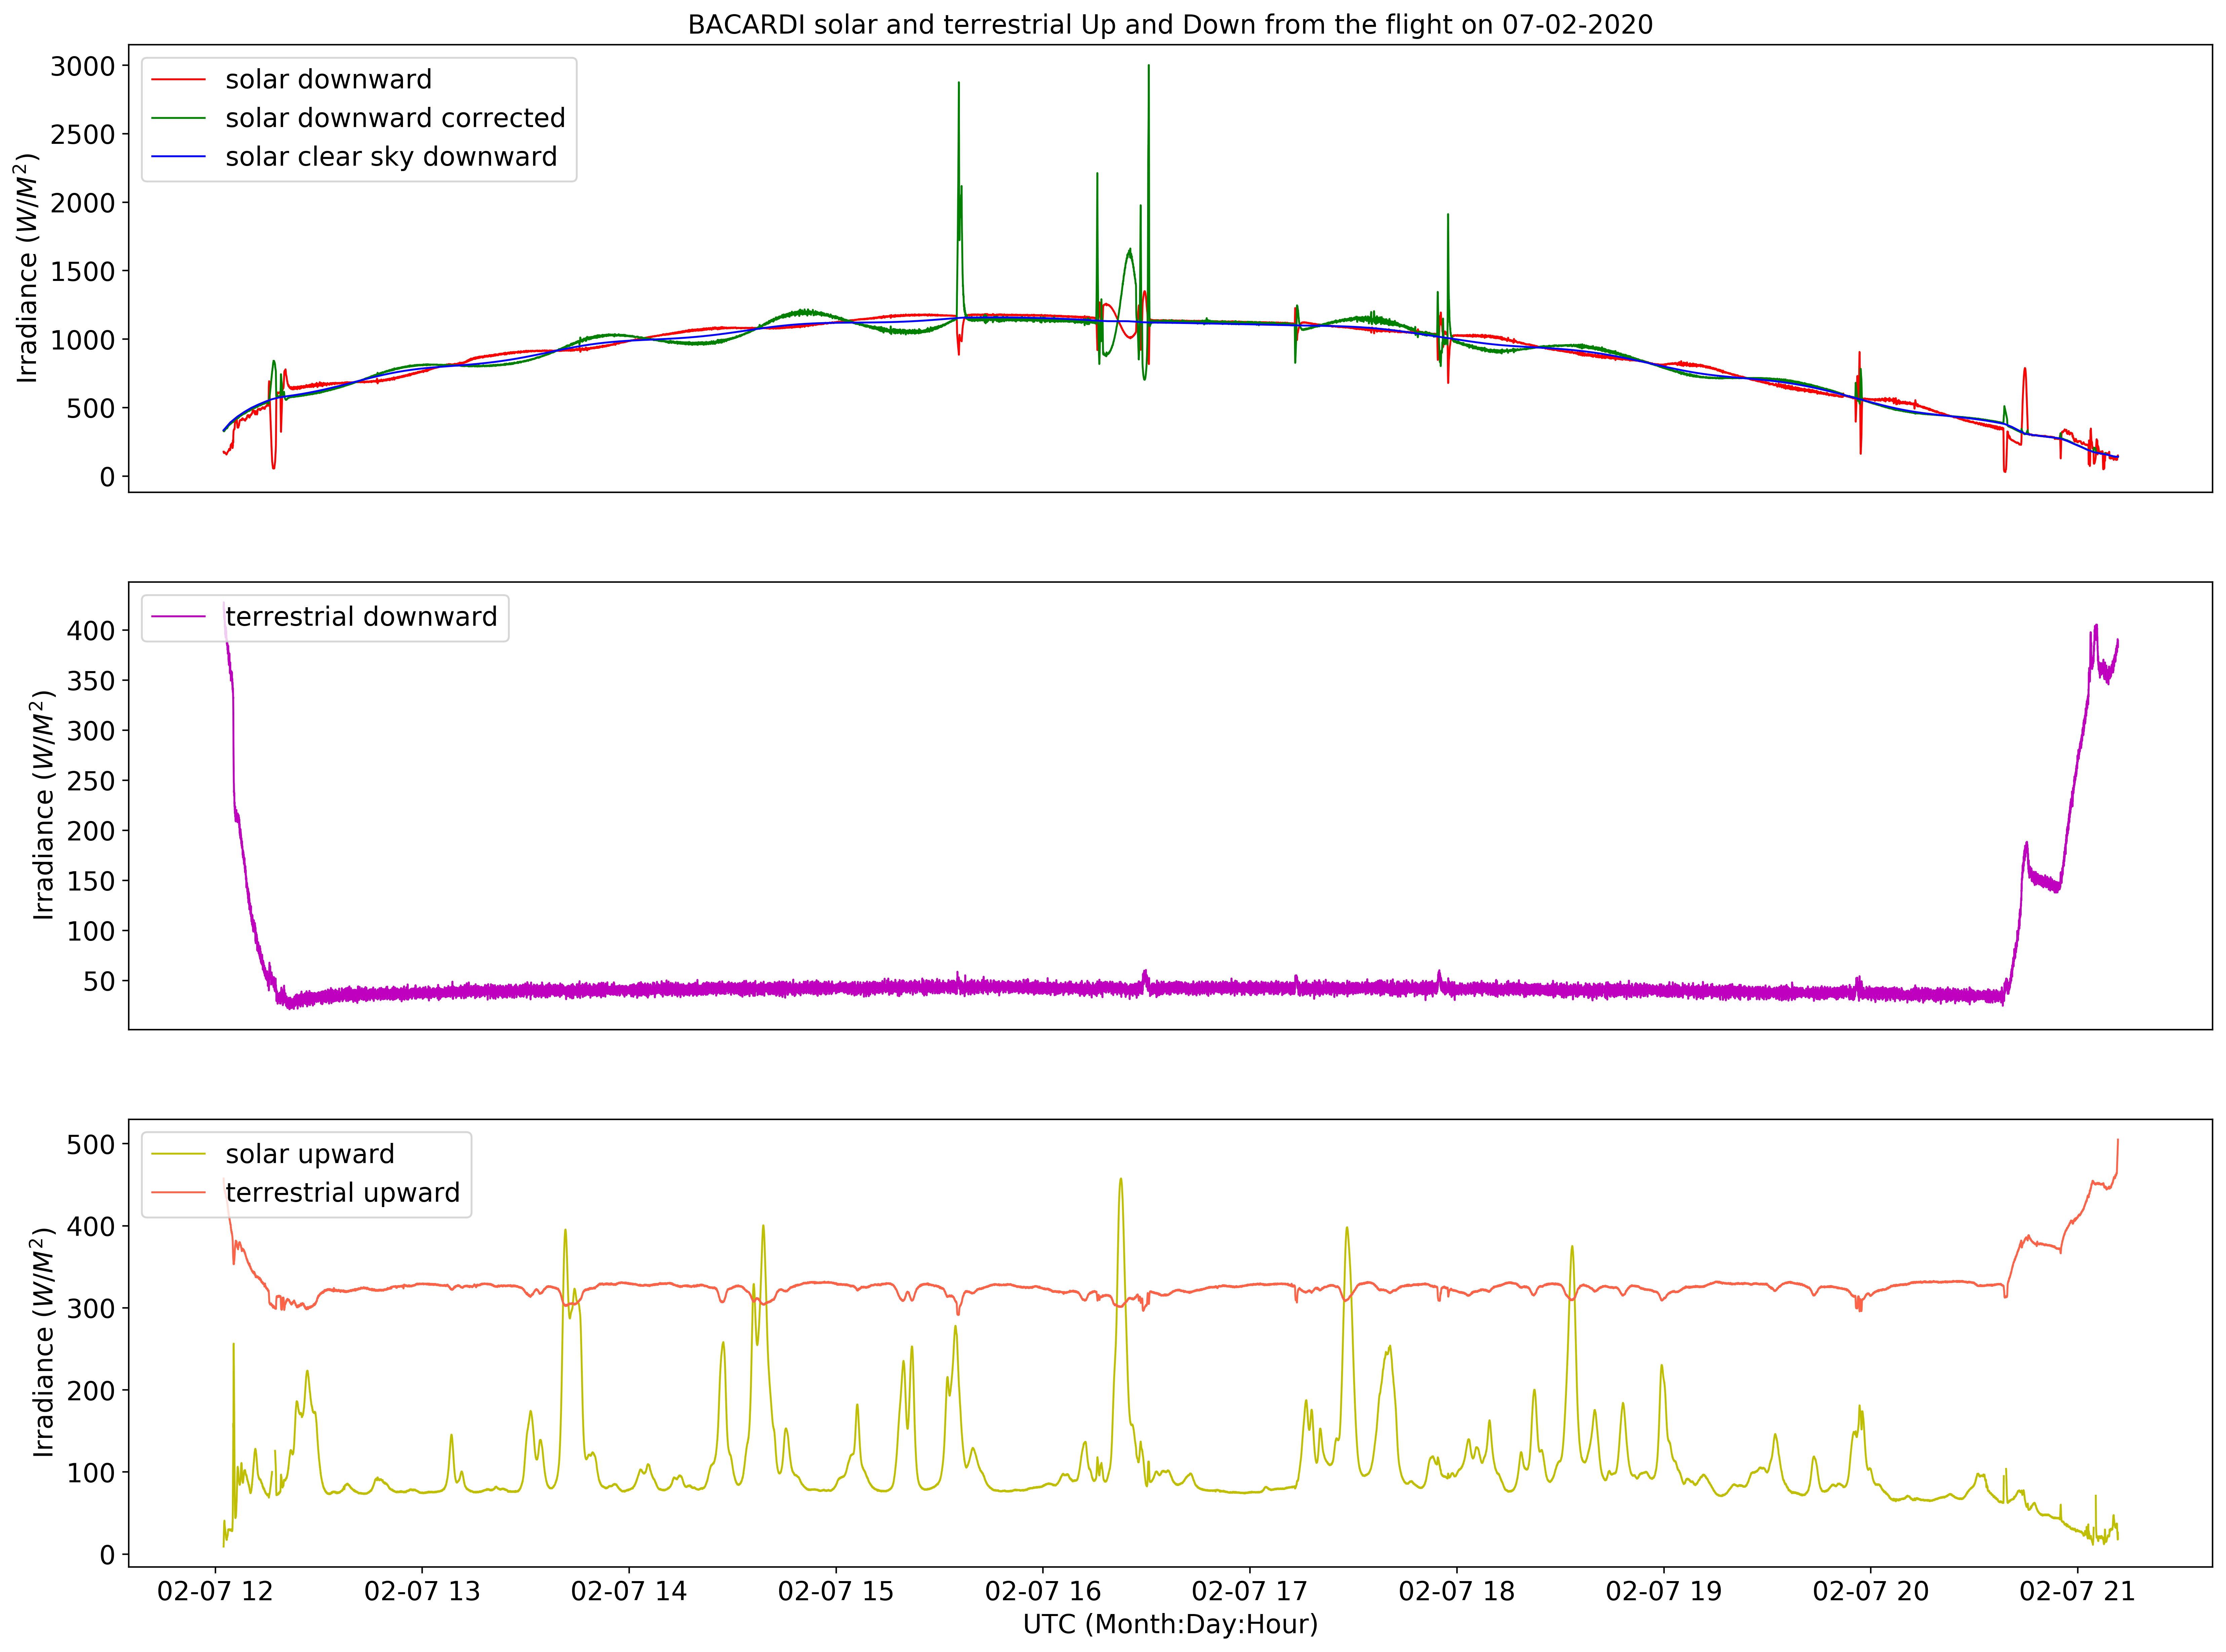

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 07-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()